In [1]:
# --------------------
# Package import

import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.special as special
import scipy.interpolate as interpolate
import seaborn as sns

colors = sns.color_palette('bright')


### Black Holes mass function

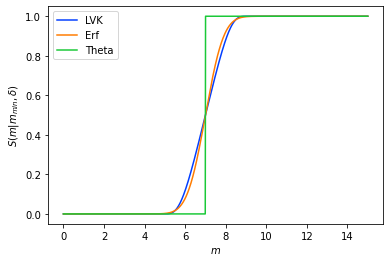

In [2]:
#### Secondary mass function

def secondary_mass(Mc, m1):

    A = (1. - 4.*Mc**5 / 27./ m1**5)**(1./2.)
    S = Mc**5/2./m1**2 * (1.-A)
    T = Mc**5/2./m1**2 * (1.+A)

    return S**(1./3.) + T**(1./3.)

def dm2dMc (Mc, m1):

    A = (1. - 4.*Mc**5 / 27./ m1**5)**(1./2.)
    S = Mc**5/2./m1**2 * (1.+A)
    T = Mc**5/2./m1**2 * (1.-A)
    dSdMc = (5./Mc * S - 5.*Mc**9./27./m1**7/A)
    dTdMc = (5./Mc * T + 5.*Mc**9./27./m1**7/A)
    return 1./3. * S**(-2./3.) * dSdMc + 1./3. * T**(-2./3.) * dTdMc

#### Smoothing function

def smoothing(mm, mmin, delta):
    tmp = np.zeros(mm.shape)
    tmp[(mm>mmin) & (mm<(mmin+delta))] = 1. / (np.exp(delta/(mm[(mm>mmin) & (mm<(mmin+delta))]-mmin) + delta/(mm[(mm>mmin) & (mm<(mmin+delta))]-mmin-delta)) + 1.)
    tmp[mm>mmin+delta] = 1.
    return tmp

def smoothing_erf(mm, mmin, delta):
    tmp = (1. + special.erf(mm-(mmin+delta/2.))) / 2.
    return tmp

def smoothing_theta(mm, mmin, delta):
    tmp = np.zeros(mm.shape)
    tmp[mm>(mmin+delta/2.)] = 1.
    return tmp

mmin=4.59
delta=4.82

mass = np.linspace(0.,15., 1001)
smooth = smoothing(mass, mmin=mmin, delta=delta)
errorfunc = smoothing_erf(mass, mmin=mmin, delta=delta)
thetafunc = smoothing_theta(mass, mmin=mmin, delta=delta)

plt.plot(mass, smooth, label='LVK', c=colors[0])
plt.plot(mass, errorfunc, label='Erf', c=colors[1])
plt.plot(mass, thetafunc, label='Theta', c=colors[2])
plt.ylabel(r'$S(m|m_{min}, \delta)$')
plt.xlabel(r'$m$')
plt.legend()
plt.show()

Secondary PDF

/var/folders/qr/vcgtz6814w9ghdt0jbwn3j940000gn/T/ipykernel_36932/3839029317.py:30: RuntimeWarning: invalid value encountered in divide
  plt.plot(q, secondary_theta/norm_secondary_theta, c=colors[i], linestyle='-.')


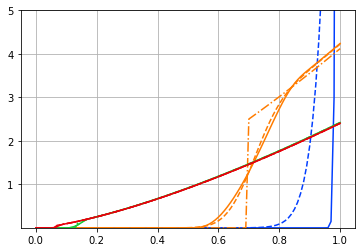

In [11]:
def secondary_pdf(q,m1):
    beta = 1.40
    tmp = q**beta * smoothing(mm=q*m1, mmin=mmin, delta=delta)
    return tmp

def secondary_pdf_erf(q,m1):
    beta = 1.40
    tmp = q**beta * smoothing_erf(mm=q*m1, mmin=mmin, delta=delta)
    return tmp

def secondary_pdf_theta(q,m1):
    beta = 1.40
    tmp = q**beta * smoothing_theta(mm=q*m1, mmin=mmin, delta=delta)
    return tmp


q = np.linspace(0.,1.,101)
m1 = [5., 10., 50., 100.]

for i,mm1 in enumerate(m1):
    secondary = secondary_pdf(q,mm1)
    norm_secondary = np.sum((secondary[:-1]+secondary[1:])*np.diff(q)/2.)
    secondary_erf = secondary_pdf_erf(q,mm1)
    norm_secondary_erf = np.sum((secondary_erf[:-1]+secondary_erf[1:])*np.diff(q)/2.)
    secondary_theta = secondary_pdf_theta(q,mm1)
    norm_secondary_theta = np.sum((secondary_theta[:-1]+secondary_theta[1:])*np.diff(q)/2.)

    plt.plot(q,secondary/norm_secondary, c=colors[i], label=r'$m_1=$'+str(np.round(mm1,2)))
    plt.plot(q,secondary_erf/norm_secondary_erf, linestyle='--', c=colors[i])
    plt.plot(q, secondary_theta/norm_secondary_theta, c=colors[i], linestyle='-.')

#plt.yscale('log')
plt.ylim(1.e-3, 5.)
plt.grid()
plt.show()

/var/folders/qr/vcgtz6814w9ghdt0jbwn3j940000gn/T/ipykernel_36932/197865684.py:24: RuntimeWarning: overflow encountered in exp
  tmp[(mm>mmin) & (mm<(mmin+delta))] = 1. / (np.exp(delta/(mm[(mm>mmin) & (mm<(mmin+delta))]-mmin) + delta/(mm[(mm>mmin) & (mm<(mmin+delta))]-mmin-delta)) + 1.)


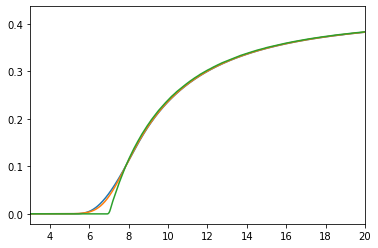

In [4]:
def norm_secondary(m1):

    q = np.linspace(0.,1.,1001)
    step = np.diff(q)[:,np.newaxis]
    qq = np.tile(q,(m1.shape[0],1)).transpose()
    mm1 = np.tile(m1, (q.shape[0],1))

    SSP = secondary_pdf(qq,mm1)
    P = np.sum( (SSP[1:]+SSP[:-1]) * step/2. , axis=0)

    return P

def norm_secondary_erf(m1):

    q = np.linspace(0.,1.,1001)
    step = np.diff(q)[:,np.newaxis]
    qq = np.tile(q,(m1.shape[0],1)).transpose()
    mm1 = np.tile(m1, (q.shape[0],1))

    SSP = secondary_pdf_erf(qq,mm1)
    P = np.sum( (SSP[1:]+SSP[:-1]) * step/2. , axis=0)

    return P

def norm_secondary_theta(m1):

    q = np.linspace(0.,1.,1001)
    step = np.diff(q)[:,np.newaxis]
    qq = np.tile(q,(m1.shape[0],1)).transpose()
    mm1 = np.tile(m1, (q.shape[0],1))

    SSP = secondary_pdf_theta(qq,mm1)
    P = np.sum( (SSP[1:]+SSP[:-1]) * step/2. , axis=0)

    return P

mass1 = np.linspace(1.,100.,1001)
norm_secondary_pdf = interpolate.interp1d(mass1, norm_secondary(mass1), kind='cubic')
norm_secondary_pdf_erf = interpolate.interp1d(mass1, norm_secondary_erf(mass1), kind='cubic')
norm_secondary_pdf_theta = interpolate.interp1d(mass1, norm_secondary_theta(mass1), kind='cubic')

mass1 = np.linspace(1.,100.,10001)

plt.plot(mass1, norm_secondary_pdf(mass1))
plt.plot(mass1, norm_secondary_pdf_erf(mass1))
plt.plot(mass1, norm_secondary_pdf_theta(mass1))
plt.xlim(3.,20.)
plt.show()


# This is likely the reason why the functions mibehaves at the extremes. I honstly think it is an issue with LVK smoothing function, because the Error Function is extremely well defined.

Primary PDF

/var/folders/qr/vcgtz6814w9ghdt0jbwn3j940000gn/T/ipykernel_36932/197865684.py:24: RuntimeWarning: overflow encountered in exp
  tmp[(mm>mmin) & (mm<(mmin+delta))] = 1. / (np.exp(delta/(mm[(mm>mmin) & (mm<(mmin+delta))]-mmin) + delta/(mm[(mm>mmin) & (mm<(mmin+delta))]-mmin-delta)) + 1.)


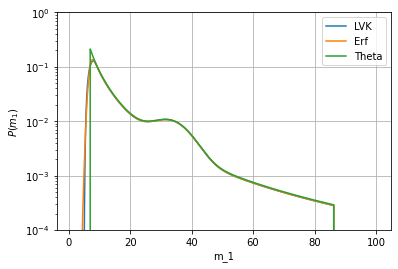

In [8]:
#### Standard smoothing

def smoothed_gaussian(x):
    mu = 33.07
    sigma = 5.69
    return np.exp(-(x-mu)**2./2./sigma**2) * smoothing(mm=x, mmin=4.59, delta=4.82)

def smoothed_powerlaw(x):
    alpha = -2.63
    mmax = 86.22
    y = x**alpha * smoothing(mm=x, mmin=4.59, delta=4.82)
    y[x>mmax] = 0.
    return y

#### Erf smoothing

def smoothed_gaussian_erf(x):
    mu = 33.07
    sigma = 5.69
    return np.exp(-(x-mu)**2./2./sigma**2) * smoothing_erf(mm=x, mmin=4.59, delta=4.82)

def smoothed_powerlaw_erf(x):
    alpha = -2.63
    mmax = 86.22
    y = x**alpha * smoothing_erf(mm=x, mmin=4.59, delta=4.82)
    y[x>mmax] = 0.
    return y

#### Theta smoothing

def smoothed_gaussian_theta(x):
    mu = 33.07
    sigma = 5.69
    return np.exp(-(x-mu)**2./2./sigma**2) * smoothing_theta(mm=x, mmin=4.59, delta=4.82)

def smoothed_powerlaw_theta(x):
    alpha = -2.63
    mmax = 86.22
    y = x**alpha * smoothing_theta(mm=x, mmin=4.59, delta=4.82)
    y[x>mmax] = 0.
    return y

masses = np.linspace(1.,100., 10001)

GG = smoothed_gaussian(masses)
NSG = np.sum((GG[:-1]+GG[1:])*np.diff(masses)/2.)
GG_erf = smoothed_gaussian_erf(masses)
NSG_erf = np.sum((GG_erf[:-1]+GG_erf[1:])*np.diff(masses)/2.)
GG_theta = smoothed_gaussian_theta(masses)
NSG_theta = np.sum((GG_theta[:-1]+GG_theta[1:])*np.diff(masses)/2.)

PP = smoothed_powerlaw(masses)
NSP = np.sum((PP[:-1]+PP[1:])*np.diff(masses)/2.)
PP_erf = smoothed_powerlaw_erf(masses)
NSP_erf = np.sum((PP_erf[:-1]+PP_erf[1:])*np.diff(masses)/2.)
PP_theta = smoothed_powerlaw_theta(masses)
NSP_theta = np.sum((PP_theta[:-1]+PP_theta[1:])*np.diff(masses)/2.)

def primary_pdf(mm):

    lambda_p = 0.10

    G = smoothed_gaussian(mm) / NSG
    P = smoothed_powerlaw(mm) / NSP

    return (1-lambda_p) * P + lambda_p * G

def primary_pdf_erf(mm):

    lambda_p = 0.10

    G = smoothed_gaussian_erf(mm) / NSG_erf
    P = smoothed_powerlaw_erf(mm) / NSP_erf

    return (1-lambda_p) * P + lambda_p * G

def primary_pdf_theta(mm):

    lambda_p = 0.10

    G = smoothed_gaussian_theta(mm) / NSG_theta
    P = smoothed_powerlaw_theta(mm) / NSP_theta

    return (1-lambda_p) * P + lambda_p * G

#plt.figure(figsize=(12.,8.))
plt.plot(masses, primary_pdf(masses), label='LVK')
plt.plot(masses, primary_pdf_erf(masses), label='Erf')
plt.plot(masses, primary_pdf_theta(masses), label='Theta')
plt.yscale('log')
plt.ylim(1.e-4, 1.)
plt.ylabel(r'$P(m_1)$')
plt.xlabel(r'm_1')
plt.legend()
plt.grid()
plt.show()


/var/folders/qr/vcgtz6814w9ghdt0jbwn3j940000gn/T/ipykernel_36932/197865684.py:24: RuntimeWarning: overflow encountered in exp
  tmp[(mm>mmin) & (mm<(mmin+delta))] = 1. / (np.exp(delta/(mm[(mm>mmin) & (mm<(mmin+delta))]-mmin) + delta/(mm[(mm>mmin) & (mm<(mmin+delta))]-mmin-delta)) + 1.)


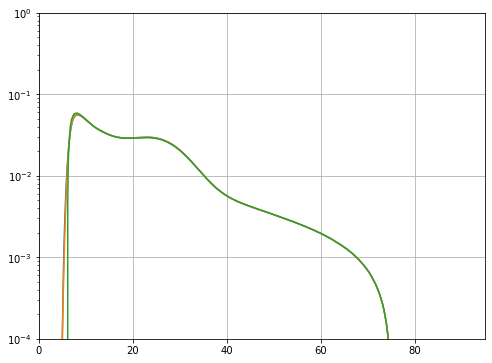

/var/folders/qr/vcgtz6814w9ghdt0jbwn3j940000gn/T/ipykernel_36932/547199582.py:75: RuntimeWarning: invalid value encountered in divide
  plt.plot(chirps, (chirps_pdf-chirps_pdf_theta)/average_theta)


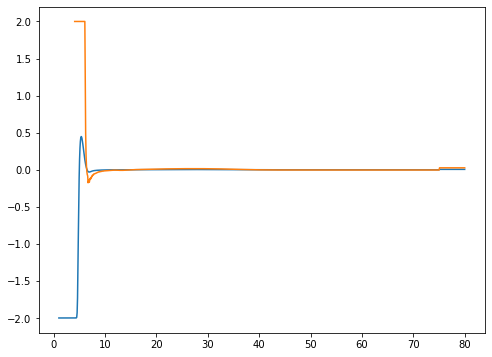

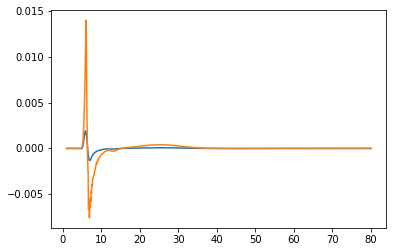

In [10]:
#### Chirp mass PDF

def chirpmass_pdf(Mc):
    
    mm1 = np.linspace(2.**(1./5.)*Mc + 0.01, 100., 1001)
    MM = np.tile(Mc, (mm1.shape[0],1))
    mm2 = secondary_mass(MM, mm1)
    qq = mm2/mm1

    primary = primary_pdf(mm1)
    secondary = secondary_pdf(qq, mm1)
    JJ = dm2dMc(MM, mm1)

    yy = primary * secondary * JJ
    y = np.sum( (yy[1:]+yy[:-1]) * np.diff(mm1, axis=0)/2. , axis=0)
    return y

def chirpmass_pdf_erf(Mc):
    
    mm1 = np.linspace(2.**(1./5.)*Mc + 0.01, 100., 1001)
    MM = np.tile(Mc, (mm1.shape[0],1))
    mm2 = secondary_mass(MM, mm1)
    qq = mm2/mm1

    primary = primary_pdf_erf(mm1)
    secondary = secondary_pdf_erf(qq, mm1)
    JJ = dm2dMc(MM, mm1)

    yy = primary * secondary * JJ
    y = np.sum( (yy[1:]+yy[:-1]) * np.diff(mm1, axis=0)/2. , axis=0)
    return y

def chirpmass_pdf_theta(Mc):
    
    mm1 = np.linspace(2.**(1./5.)*Mc + 0.01, 100., 1001)
    MM = np.tile(Mc, (mm1.shape[0],1))
    mm2 = secondary_mass(MM, mm1)
    qq = mm2/mm1

    primary = primary_pdf_theta(mm1)
    secondary = secondary_pdf_theta(qq, mm1)
    JJ = dm2dMc(MM, mm1)

    yy = primary * secondary * JJ
    y = np.sum( (yy[1:]+yy[:-1]) * np.diff(mm1, axis=0)/2. , axis=0)
    return y


chirps = np.linspace(1.,80.,1001)
chirps_pdf = chirpmass_pdf(chirps)
norm_chirpmass_pdf = np.sum((chirps_pdf[:-1]+chirps_pdf[1:]) * np.diff(chirps)/2.)
chirps_pdf_erf = chirpmass_pdf_erf(chirps)
norm_chirpmass_pdf_erf = np.sum((chirps_pdf_erf[:-1]+chirps_pdf_erf[1:]) * np.diff(chirps)/2.)
chirps_pdf_theta = chirpmass_pdf_theta(chirps)
norm_chirpmass_pdf_theta = np.sum((chirps_pdf_theta[:-1]+chirps_pdf_theta[1:]) * np.diff(chirps)/2.)

plt.figure(figsize=(8.,6.))
plt.plot(chirps, chirpmass_pdf(chirps)/norm_chirpmass_pdf)
plt.plot(chirps, chirpmass_pdf_erf(chirps)/norm_chirpmass_pdf_erf)
plt.plot(chirps, chirpmass_pdf_theta(chirps)/norm_chirpmass_pdf_theta)
plt.yscale('log')
plt.ylim(1.e-4, 1.)
plt.xlim(0., 95.)
plt.grid()
plt.show()

chirps_pdf = chirps_pdf/norm_chirpmass_pdf
chirps_pdf_erf = chirps_pdf_erf/norm_chirpmass_pdf_erf
chirps_pdf_theta = chirps_pdf_theta/norm_chirpmass_pdf_theta
average_erf = (chirps_pdf_erf+chirps_pdf)/2.
average_theta = (chirps_pdf_theta+chirps_pdf)/2.

plt.figure(figsize=(8.,6.))
plt.plot(chirps, (chirps_pdf-chirps_pdf_erf)/average_erf)
plt.plot(chirps, (chirps_pdf-chirps_pdf_theta)/average_theta)
plt.show()

plt.plot(chirps, chirps_pdf-chirps_pdf_erf)
plt.plot(chirps, chirps_pdf-chirps_pdf_theta)
plt.show()